In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
ds=pd.read_csv("Salary_dataset.csv")

In [11]:
ds.head(30)

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [12]:
#EDA

ds=ds.drop("Unnamed: 0",axis=1)
ds

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


In [13]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [14]:
ds.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [15]:
ds.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


In [16]:
cor=ds.corr()
cor.style.background_gradient(cmap='winter')

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [17]:
x=ds[["YearsExperience"]]

In [18]:
y=ds["Salary"]

In [19]:
#Train test Process
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [21]:
x_train

,YearsExperience
27,9.7
11,4.1
17,5.4
22,8.0
5,3.0
16,5.2
8,3.3
14,4.6
23,8.3
20,6.9


In [29]:
#MACHINE LEARNING MODEL BUILDING

In [28]:
from sklearn.linear_model import LinearRegression

In [23]:
rmodel=LinearRegression()
rmodel.fit(x_train,y_train)

LinearRegression()

In [24]:
y_pred=rmodel.predict(x_test)
print(y_pred)

[ 40749.96184072 122700.62295594  64962.65717022  63100.14214487
 115250.56285456 107800.50275317]


In [25]:
print(rmodel.coef_)

[9312.57512673]


In [26]:
print(rmodel.intercept_)

25849.84163795526


In [27]:
#Calculating R Squared Score
from sklearn.metrics import r2_score

In [52]:
r=r2_score(y_test,y_pred)
r*100

98.8169515729126

<AxesSubplot:xlabel='Salary'>

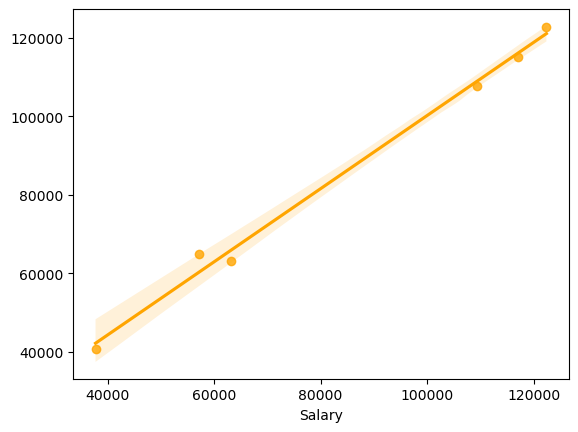

In [53]:
sns.regplot(data=ds,x=y_test,y=y_pred,color='orange')